In [1]:
# import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

In [2]:
# read the csv and remove the unwanted column
df = pd.read_csv("../Boston.csv").drop("Unnamed: 0", axis=1)
df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7


In [3]:
# regress lstat against medv. remember to turn lstat from series to dataframe 
# X can be a dataframe or list to run regression using StatsModel
# X = pd.DataFrame(df["lstat"], columns=["lstat"])
X = df["lstat"]
y = df["medv"]

In [4]:
# adding the constant term. just because that is how it is done
# but really it is to better fit the line by adding a constant term because according to
# the documentation intercept is not included by default and should be added by the user
# which objectively dumb
X = sm.add_constant(X)

In [5]:
# regress and fit the model
model = sm.OLS(y, X)
results = model.fit()

In [6]:
# get the summary table
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           5.08e-88
Time:                        20:52:35   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# get only the coefficients and assign them to variables

beta0, beta1 = results.params

In [8]:
# get the residual min, max and median respectively
print(results.resid.min())
print(results.resid.max())
print(results.resid.median())

-15.167451971770108
24.500129461930577
-1.3181864253363393


In [9]:
# predict value at lstat of 10
# mean is the predicted value
# mean_ci are 95% confidence intervals
# obs_ci are 95% prediction intervals (usually a wider range than confidence intervals)
x_test = np.array([1, 10])
results.get_prediction(x_test).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068


In [10]:
# predict multiple values of lstat
x_tests = np.array([[1, 5], [1, 10], [1, 15]])
results.get_prediction(x_tests).summary_frame(alpha=0.5)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.530062,30.077127,25.599193,34.007996
1,25.053347,0.294814,24.854355,25.252340,20.853137,29.253558
2,20.303101,0.290893,20.106754,20.499447,16.103014,24.503187


In [11]:
import matplotlib.pyplot as plt

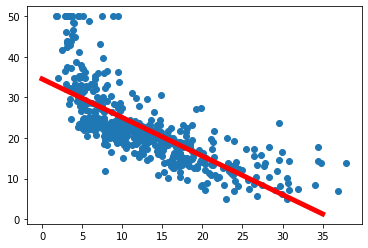

In [12]:
# re-assign x variable because of first X has constant added
# knowing the graph ends somewhere around 35 on x-axis create numpy array to 35
# create y = mx + c for the numpy array

x = df["lstat"]
new_x = np.array([0, 35])
new_y = beta0 + (beta1 * new_x)

plt.scatter(x, y)
plt.plot(new_x, new_y, color="red", linewidth=5)
plt.show()